In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [196]:
data = pd.read_csv('Kobe.csv')

In [197]:
data.head(50)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [198]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**

4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC


5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

## Решение

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Анализ данных 

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

Посмотрим, что за данные перед нами и какие признаки могут понадобиться для предсказывания попадания с той или иной позиции Великого баскетболиста Коби Брайнта. Нужные признаки в первой итерации, т.к. возможно исключение некоторых: 

- combined_shot_type - тип броска, 
- lat, lon - пока не понятно, 
- loc_x, loc_y - координаты броска, 
- minutes_remaining, seconds_remaining - сколько осталось минут, секунд до конца периода, 
- period - период, 
- playoffs - плейофф это был, 
- season - сезон, 
- shot_distance  - дистанция броска, 
- shot_made_flag(целевая переменная) - реализация броска, 
- shot_type - 2-х или 3-х очковый бросок, 
- shot_zone_area, shot_zone_basic, shot_zone_range  - идентификация зоны броска, 
- game_date - дата игры, 
- opponent - соперник.

Итого, оставим данные для анализа с выбранными признаками.

In [252]:
df = data[['combined_shot_type', 'lat', 'lon','loc_x','loc_y','minutes_remaining','seconds_remaining','period',
           'playoffs','season','shot_distance','shot_type','shot_zone_area','shot_zone_basic',
           'shot_zone_range','game_date','opponent','shot_made_flag']]

In [202]:
df.head()

,combined_shot_type,lat,lon,loc_x,loc_y,minutes_remaining,seconds_remaining,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,shot_made_flag
0,Jump Shot,33.9723,-118.1028,167,72,10,27,1,0,2000-01,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR,NaN
1,Jump Shot,34.0443,-118.4268,-157,0,10,22,1,0,2000-01,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,0.0
2,Jump Shot,33.9093,-118.3708,-101,135,7,45,1,0,2000-01,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR,1.0
3,Jump Shot,33.8693,-118.1318,138,175,6,52,1,0,2000-01,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR,0.0
4,Dunk,34.0443,-118.2698,0,0,6,19,2,0,2000-01,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR,1.0


C:\Users\first\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


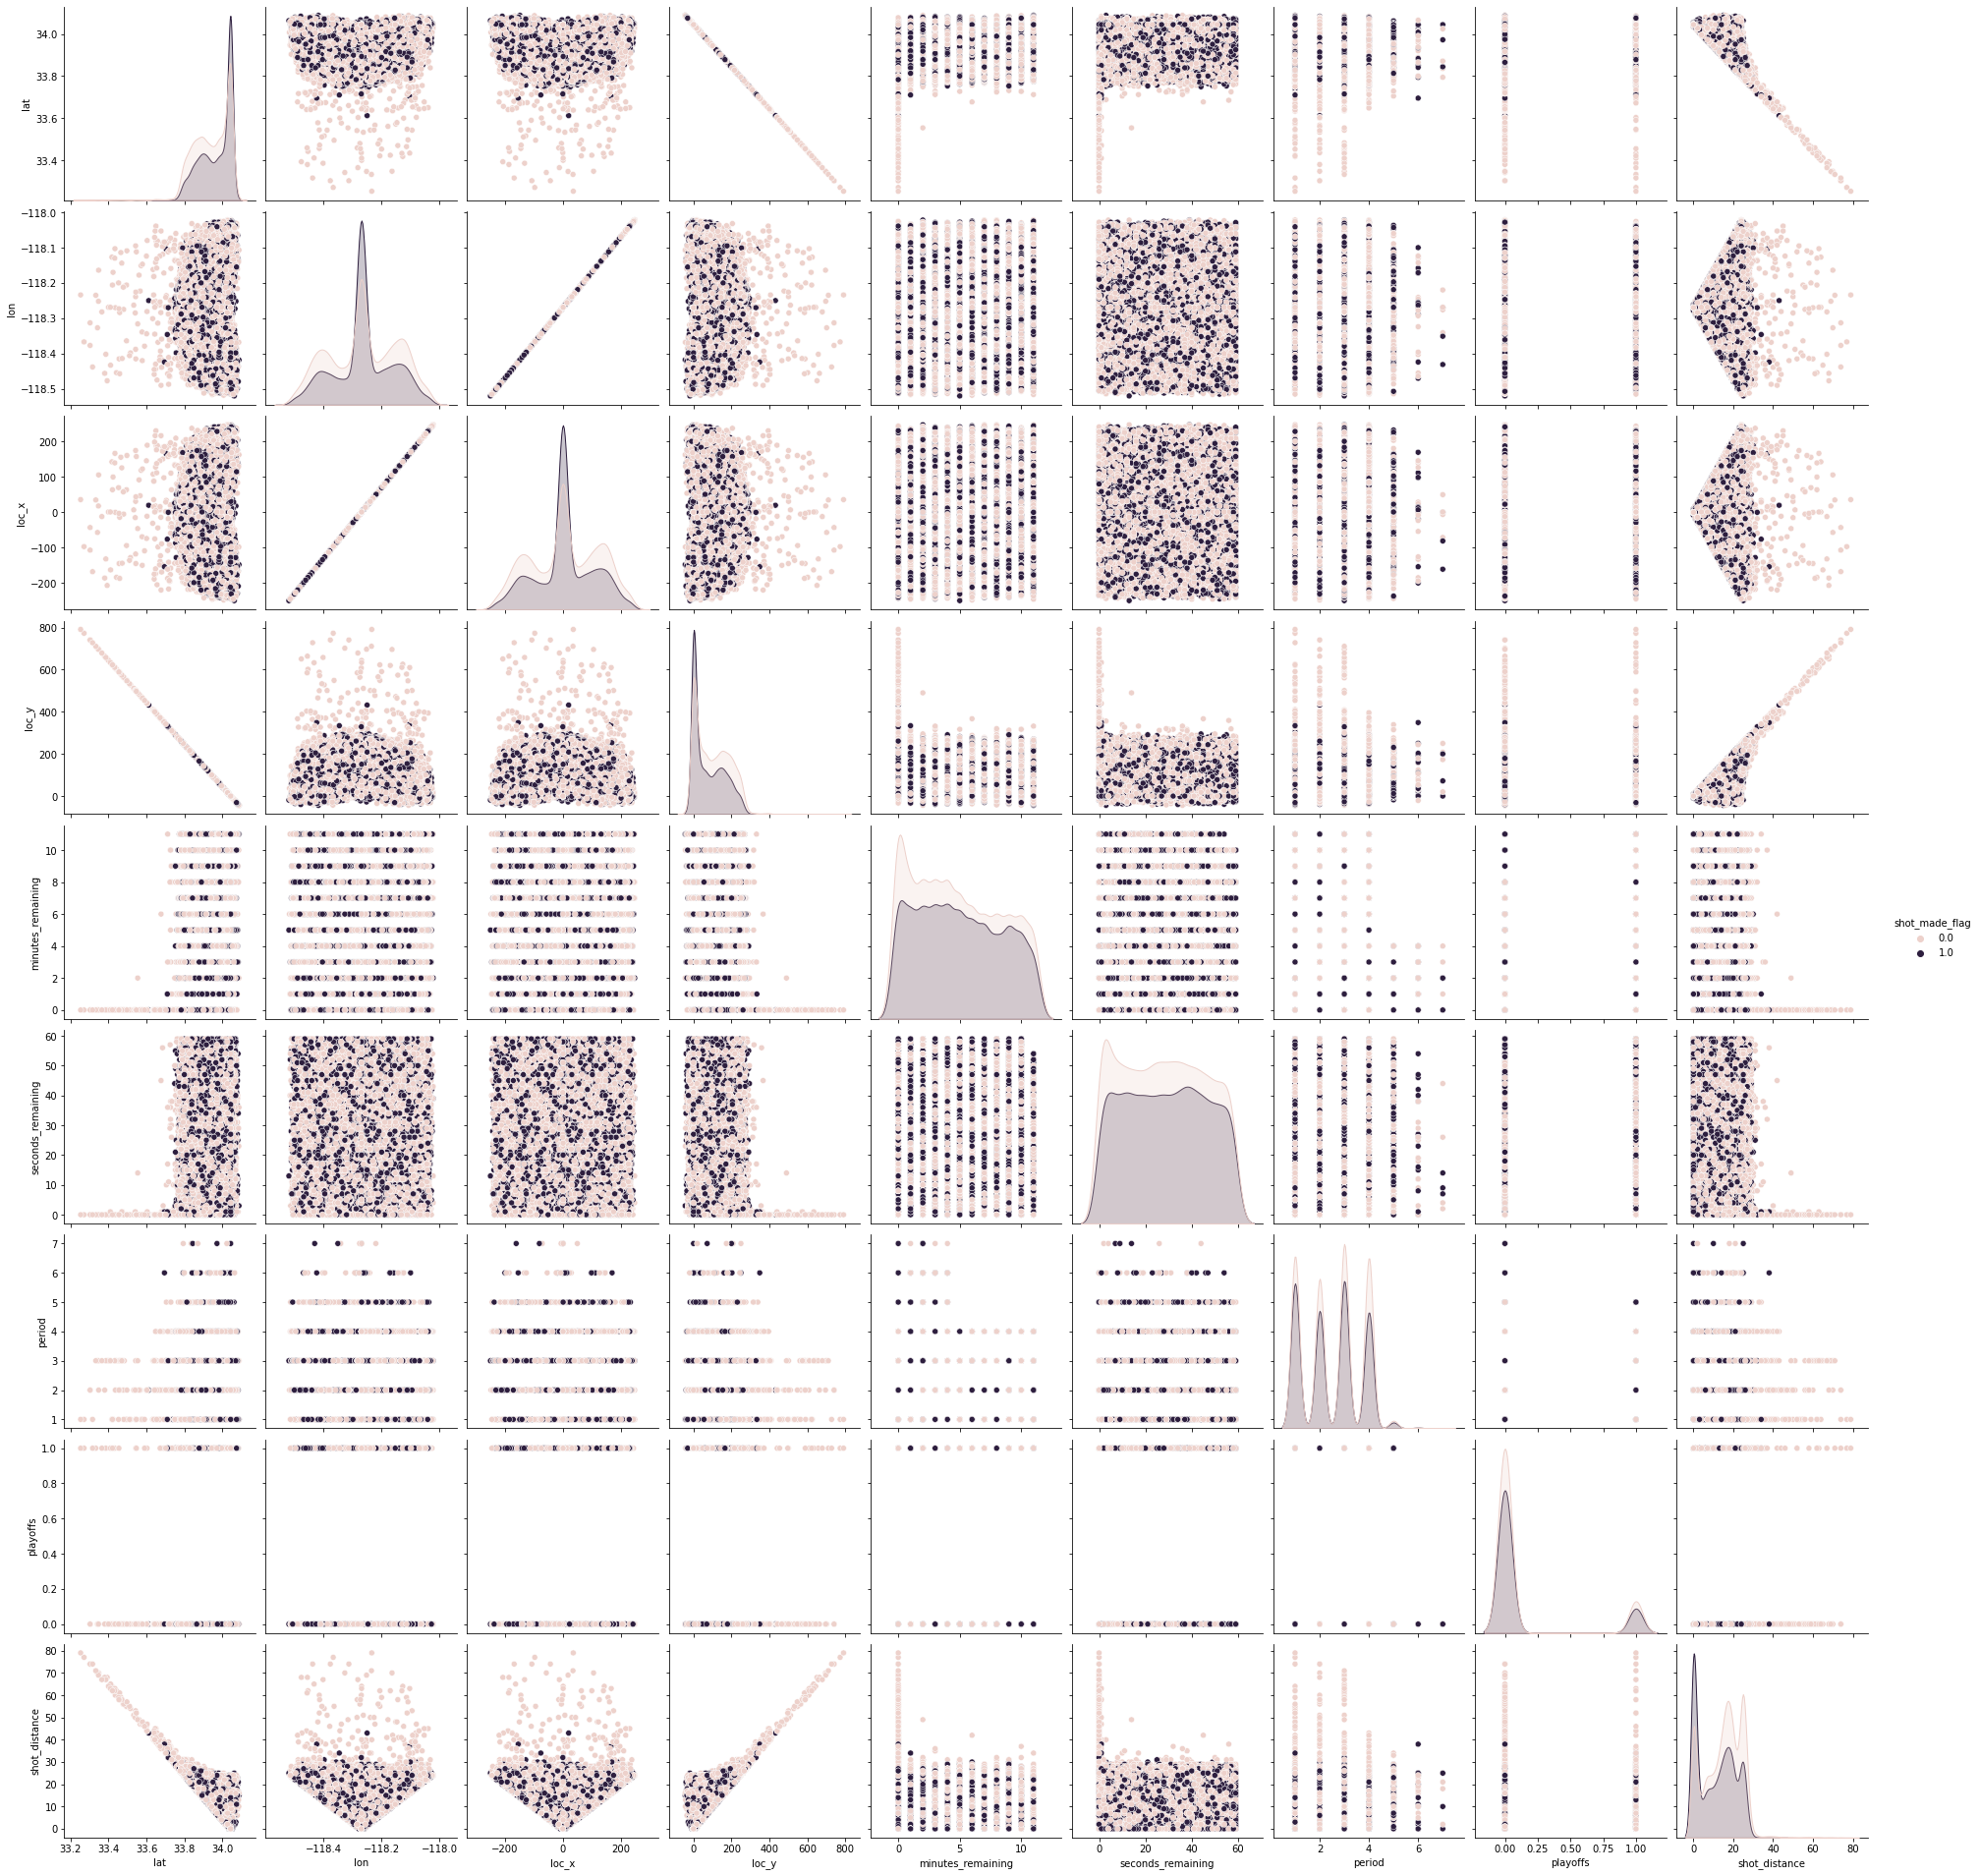

In [217]:
sns.pairplot(df, hue='shot_made_flag', size=3)
plt.show()

Явно видно, что по таргетной переменной зависимость есть по loc_x и loc_y.
Отобразим баскетбольную площадку с бросками и их координатами, которые были реализованы и которые были промазаны.


(-50.0, 900.0)

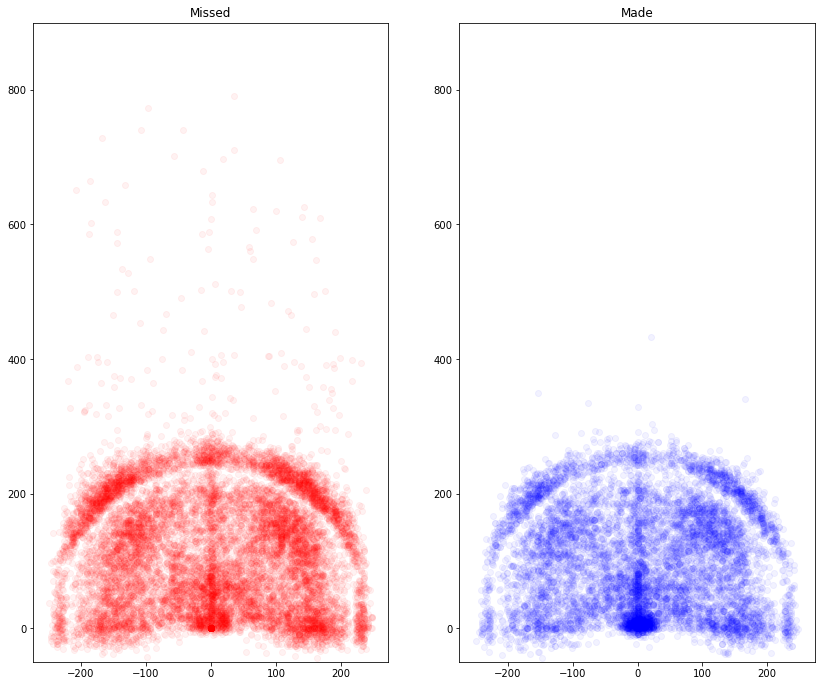

In [204]:
plt.figure(figsize=(2 * 7, 7*(84.0/50.0)))
graph = df[df['shot_made_flag'] == 0]
plt.subplot(121)
plt.scatter(graph.loc_x, graph.loc_y, color = 'red', alpha = 0.05)
plt.title('Missed')
ax = plt.gca()
ax.set_ylim([-50, 900])
graph = df[df['shot_made_flag'] == 1]
plt.subplot(122)
plt.scatter(graph.loc_x, graph.loc_y, color = 'blue', alpha = 0.05)
plt.title('Made')
ax = plt.gca()
ax.set_ylim([-50, 900])

Видно, что больше всего реализованный бросков было из-под кольца и под 45 градусов на 3-х очковой линии, промазано в том числе из тех же позиций, однако ещё видно скопление под 45 градусов в 2-х очковой зоне. 

C:\Users\first\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


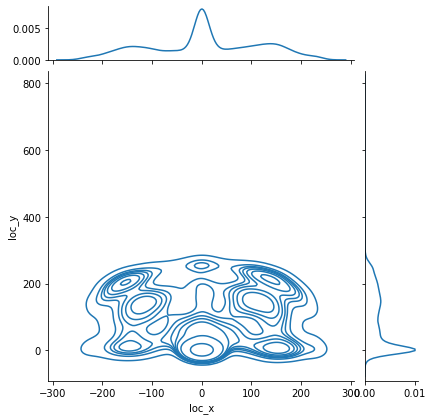

In [205]:
sns.jointplot(df.loc_x, df.loc_y, data =df.shot_made_flag, kind='kde', marginal_ticks=True )

Посмотрим все броски с точки зрения местопложения, заодно проверим на наличие выбросов.

C:\Users\first\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\first\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-50.0, 900.0)

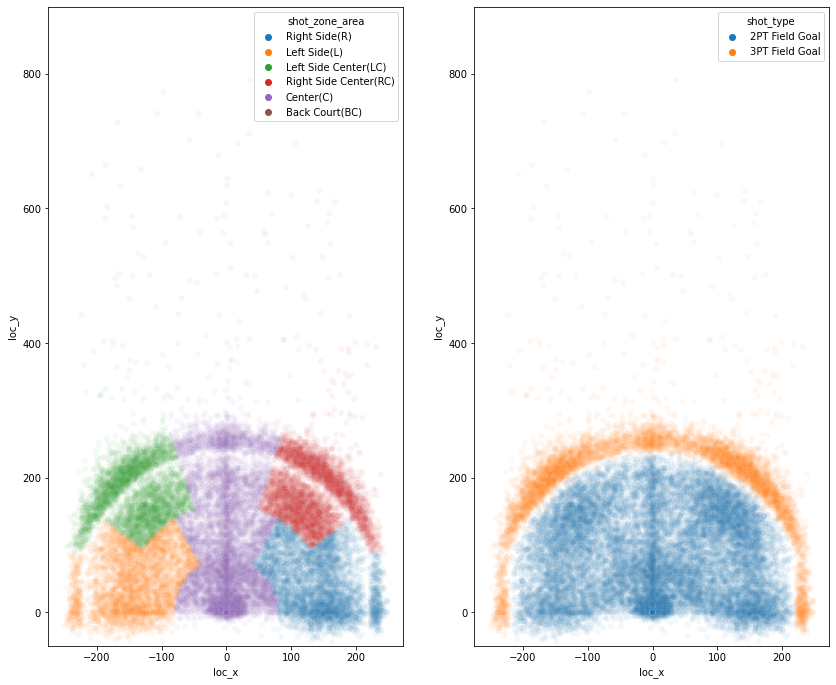

In [206]:
plt.figure(figsize=(2 * 7, 7*(84.0/50.0)))
plt.subplot(121)
sns.scatterplot(df.loc_x, df.loc_y, hue=df.shot_zone_area, alpha=0.05)
ax = plt.gca()
ax.set_ylim([-50, 900])
plt.subplot(122)
sns.scatterplot(df.loc_x, df.loc_y, hue=df.shot_type, alpha=0.05)
ax = plt.gca()
ax.set_ylim([-50, 900])

Выбросов не обнаружено, броски как и подобает в основном были реализованы на стороне оппонента в пределах 3-х очковой линии, однако были броски и с более дальних позиций, что нормально для баскетбола.
Построим график точек при немного другой классификации позиций бросков. Мало ли получится увидеть что-то необычное. 

C:\Users\first\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\first\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-50.0, 900.0)

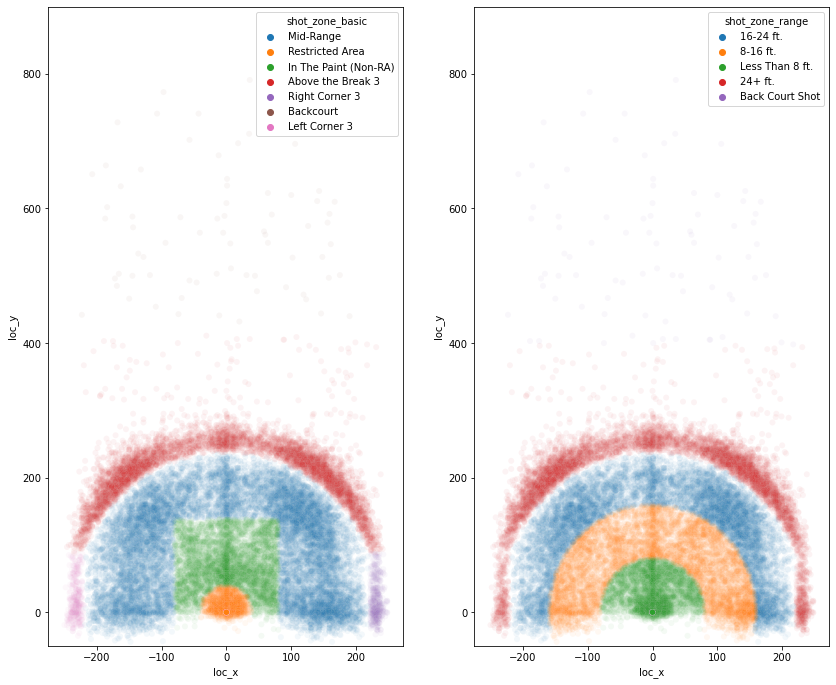

In [207]:
plt.figure(figsize=(2 * 7, 7*(84.0/50.0)))
plt.subplot(121)
sns.scatterplot(df.loc_x, df.loc_y, hue=df.shot_zone_basic, alpha=0.05)
ax = plt.gca()
ax.set_ylim([-50, 900])
plt.subplot(122)
sns.scatterplot(df.loc_x, df.loc_y, hue=df.shot_zone_range, alpha=0.05)
ax = plt.gca()
ax.set_ylim([-50, 900])

Посмоотрим точность бросков по сезонам при средней дальности броска.

In [208]:
seasons = df[['shot_distance', 'shot_made_flag', 'season']].groupby('season').mean()
seasons

,shot_distance,shot_made_flag
season,,
1996-97,11.874214,0.422977
1997-98,11.559151,0.430864
1998-99,11.695983,0.458824
1999-00,11.928979,0.460366
2000-01,12.118844,0.466667
2001-02,11.558185,0.458431
2002-03,13.464525,0.436285
2003-04,12.077534,0.433260
2004-05,13.554381,0.436557


Видно, что при таком достаточно грубом усреднении точность менялась вполне логично: в начале карьеры - небольшая, далее увеличилась и примерно находилась на одном уровне, а в конце карьеры - уменьшилась.

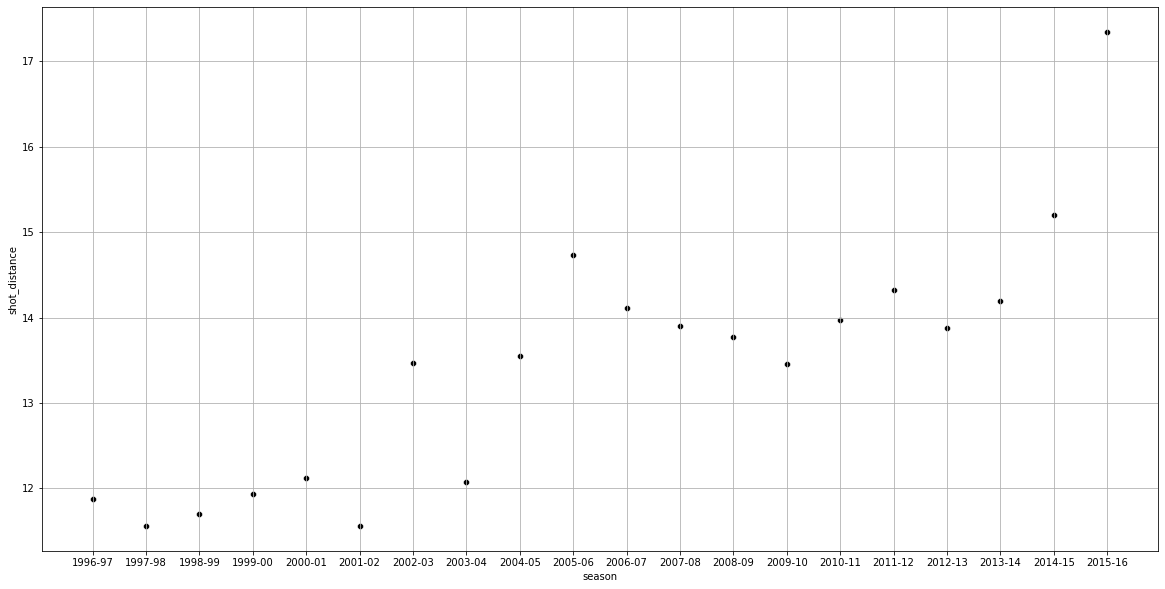

In [209]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=seasons.shot_distance, color='black')
plt.grid()

При этом на графике выше видно, что дистанция бросков в среднем увеличивалась.

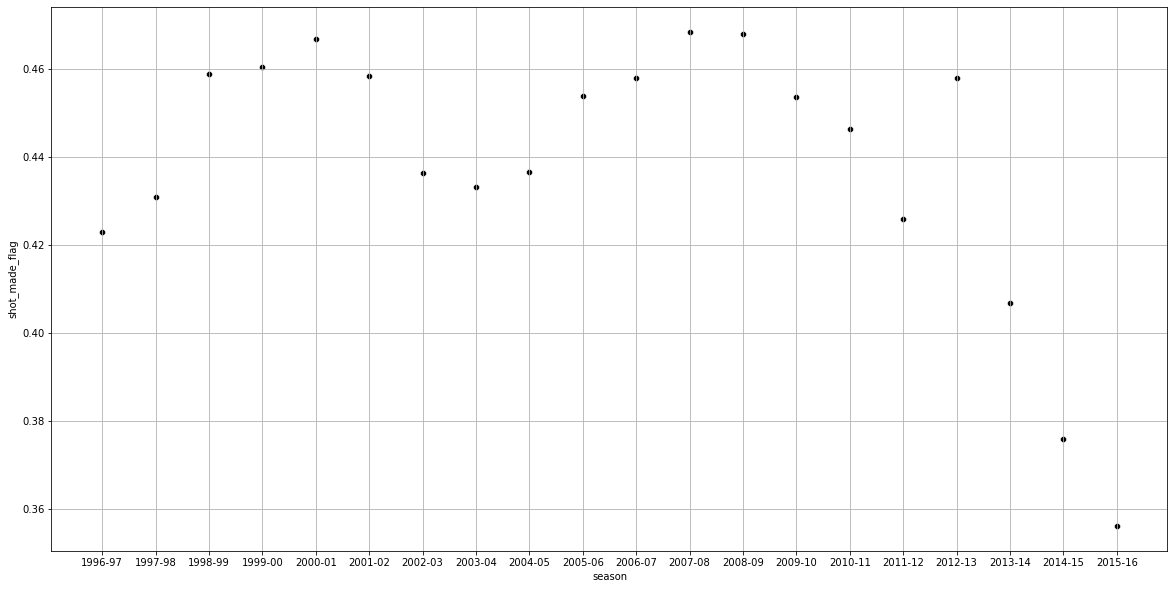

In [211]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=seasons.shot_made_flag, color='black')
plt.grid()

А здесь на графике выше видна динамика ухудшения точности броска по сезонам.

In [212]:
stat = df[['shot_distance', 'shot_made_flag', 'season']].groupby('season').describe()
stat

shot_distance                                                     \
                count       mean        std  min   25%   50%   75%   max   
season                                                                     
1996-97         477.0  11.874214  10.538291  0.0   0.0  14.0  23.0  62.0   
1997-98         989.0  11.559151  10.480259  0.0   0.0  11.0  21.0  58.0   
1998-99         921.0  11.695983   9.091616  0.0   1.0  13.0  19.0  58.0   
1999-00        1577.0  11.928979   9.150187  0.0   3.0  13.0  19.0  67.0   
2000-01        1868.0  12.118844   9.023021  0.0   3.0  14.0  18.0  70.0   
2001-02        2028.0  11.558185   8.663305  0.0   2.0  13.0  18.0  67.0   
2002-03        2241.0  13.464525   9.157194  0.0   6.0  15.0  20.0  68.0   
2003-04        1638.0  12.077534  10.121351  0.0   0.0  13.0  20.0  71.0   
2004-05        1324.0  13.554381  10.574613  0.0   0.0  15.0  24.0  74.0   
2005-06        2318.0  14.733822   9.331075  0.0   7.0  17.0  22.0  65.0   
2006-07        1887.0  14.113408   9.589389  0.0   5.0  16.0  21.0  77.0   
2007-08        2153.0  13.905248   9.812477  0.0   3.0  16.0  22.0  74.0   
2008-09        2242.0  13.772079   8.998749  0.0   7.0  15.5  21.0  63.0   
2009-10        2080.0  13.460577   9.182317  0.0   6.0  14.0  20.0  79.0   
2010-11        1825.0  13.968219   8.654940  0.0   6.0  14.0  21.0  56.0   
2011-12        1637.0  14.325596   8.469832  0.0   7.0  15.0  21.0  52.0   
2012-13        1593.0  13.875706   9.446869  0.0   4.0  15.0  23.0  69.0   
2013-14          73.0  14.191781   8.520657  0.0   7.0  15.0  21.0  27.0   
2014-15         713.0  15.204769   8.488434  0.0   9.0  17.0  23.0  49.0   
2015-16        1113.0  17.345912   8.340108  0.0  12.0  19.0  24.0  57.0   

        shot_made_flag                                               
                 count      mean       std  min  25%  50%  75%  max  
season                                                               
1996-97          383.0  0.422977  0.494678  0.0  0.0  0.0  1.0  1.0  
1997-98          810.0  0.430864  0.495503  0.0  0.0  0.0  1.0  1.0  
1998-99          765.0  0.458824  0.498628  0.0  0.0  0.0  1.0  1.0  
1999-00         1312.0  0.460366  0.498617  0.0  0.0  0.0  1.0  1.0  
2000-01         1575.0  0.466667  0.499046  0.0  0.0  0.0  1.0  1.0  
2001-02         1708.0  0.458431  0.498415  0.0  0.0  0.0  1.0  1.0  
2002-03         1852.0  0.436285  0.496058  0.0  0.0  0.0  1.0  1.0  
2003-04         1371.0  0.433260  0.495707  0.0  0.0  0.0  1.0  1.0  
2004-05         1127.0  0.436557  0.496179  0.0  0.0  0.0  1.0  1.0  
2005-06         1924.0  0.453742  0.497985  0.0  0.0  0.0  1.0  1.0  
2006-07         1579.0  0.457885  0.498381  0.0  0.0  0.0  1.0  1.0  
2007-08         1819.0  0.468389  0.499137  0.0  0.0  0.0  1.0  1.0  
2008-09         1851.0  0.467855  0.499100  0.0  0.0  0.0  1.0  1.0  
2009-10         1772.0  0.453725  0.497995  0.0  0.0  0.0  1.0  1.0  
2010-11         1521.0  0.446417  0.497284  0.0  0.0  0.0  1.0  1.0  
2011-12         1416.0  0.425847  0.494646  0.0  0.0  0.0  1.0  1.0  
2012-13         1328.0  0.457831  0.498406  0.0  0.0  0.0  1.0  1.0  
2013-14           59.0  0.406780  0.495450  0.0  0.0  0.0  1.0  1.0  
2014-15          593.0  0.376054  0.484803  0.0  0.0  0.0  1.0  1.0  
2015-16          932.0  0.356223  0.479139  0.0  0.0  0.0  1.0  1.0

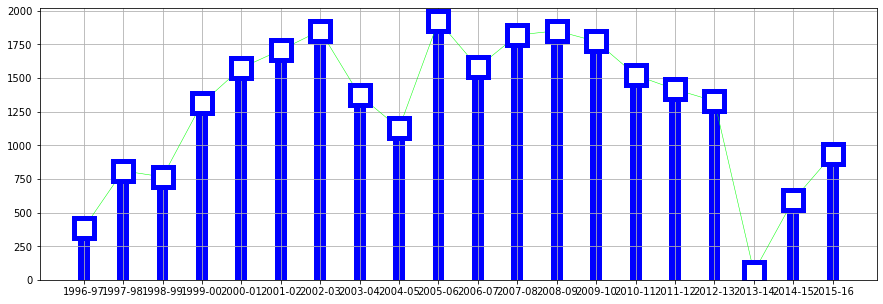

In [222]:
plt.figure(figsize=(15,5))
plt.plot(stat['shot_made_flag']['count'], 
        marker = 's',
        markersize = 20,
        color = 'lime',
        linewidth = 0.5,
        markerfacecolor = 'white',
        markeredgecolor = 'blue',
        markeredgewidth = 5)
plt.bar(stat.index, stat['shot_made_flag']['count'], 0.3,
        color="blue") 
plt.grid()

При всех комментариях выше по столбцам видно и количество бросков к данной точности, т.е. мало того, что, к примеру, в конце сезона точность упала = так и количество бросков. Чего не скажешь в середине карьеры: много бросков = хорошая точность.

<AxesSubplot:>

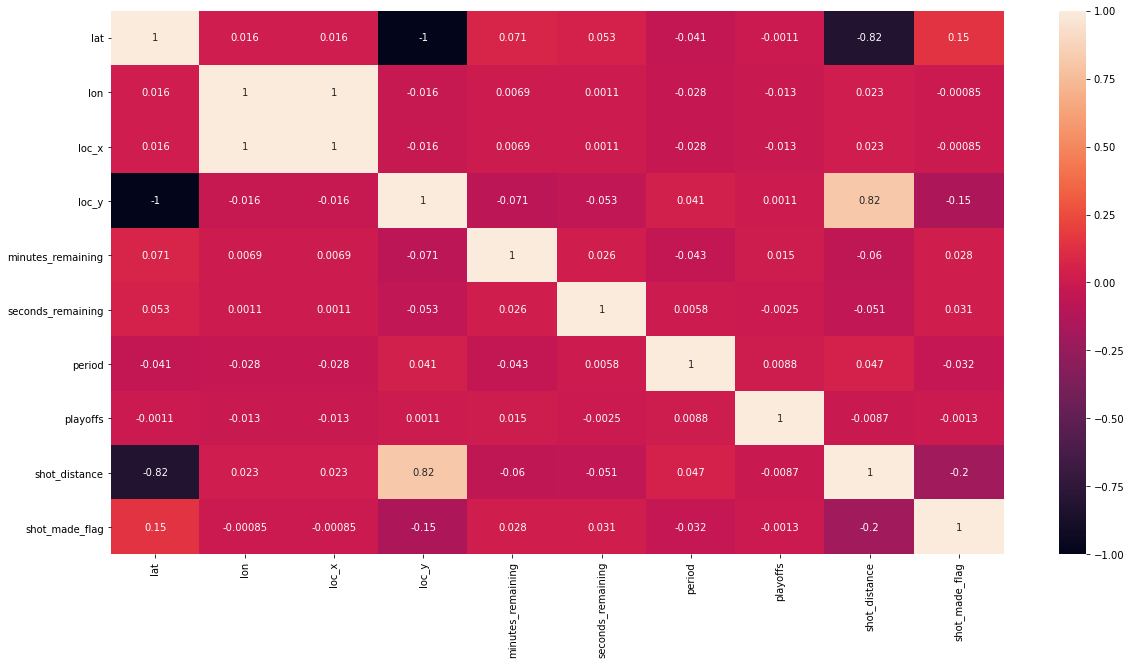

In [214]:
corr = df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr, annot=True)

Проверим корелляцию каких-либо признаков между собой: кроме связанных признаков типа loc_x = lon, loc_y = lat (взаимоисключающие), есть связь с shot_distance, что собственно связано также с расстоянием, поэтому ничего особенного обнаруженно не было.

### Подготовить фичи

In [229]:
from sklearn.preprocessing import LabelEncoder

Переведём категориальные признаки в количественные при помощи LabelEncoding.

In [253]:
le = LabelEncoder()

In [254]:
for name in ['combined_shot_type','season','shot_type','shot_zone_area','shot_zone_basic',
           'shot_zone_range','opponent']:
    df['Encod_' + name] = le.fit_transform(df[name])

<ipython-input-254-44243b636b50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Encod_' + name] = le.fit_transform(df[name])


Заменим пропуски в shot_made_flag на соответсвующее среднее значение, определённое по группировке сезон-тип дистанции, если больше 0,5 тогда 1, если менбше 0.

In [255]:
df_gap = df['shot_made_flag'].isna()

In [256]:
index = -1
for boole in df_gap:
    index += 1
    if boole == True:
        season = df['season'][index]
        zone = df['shot_zone_range'][index]
        aprec = df[(df['season'] == season) & (df['shot_zone_range'] == zone)]['shot_made_flag'].mean()
        if aprec >= 0.5:
            df['shot_made_flag'][index] = 1
        else:
            df['shot_made_flag'][index] = 0

<ipython-input-256-0faade21322b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shot_made_flag'][index] = 0
<ipython-input-256-0faade21322b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shot_made_flag'][index] = 1


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   combined_shot_type        30697 non-null  object 
 1   lat                       30697 non-null  float64
 2   lon                       30697 non-null  float64
 3   loc_x                     30697 non-null  int64  
 4   loc_y                     30697 non-null  int64  
 5   minutes_remaining         30697 non-null  int64  
 6   seconds_remaining         30697 non-null  int64  
 7   period                    30697 non-null  int64  
 8   playoffs                  30697 non-null  int64  
 9   season                    30697 non-null  object 
 10  shot_distance             30697 non-null  int64  
 11  shot_type                 30697 non-null  object 
 12  shot_zone_area            30697 non-null  object 
 13  shot_zone_basic           30697 non-null  object 
 14  shot_z

Убедились, что пропусков больше нет. Сформируем датасет для модели без категориальных столбцов.

In [258]:
df.head()

,combined_shot_type,lat,lon,loc_x,loc_y,minutes_remaining,seconds_remaining,period,playoffs,season,...,game_date,opponent,shot_made_flag,Encod_combined_shot_type,Encod_season,Encod_shot_type,Encod_shot_zone_area,Encod_shot_zone_basic,Encod_shot_zone_range,Encod_opponent
0,Jump Shot,33.9723,-118.1028,167,72,10,27,1,0,2000-01,...,2000-10-31,POR,0.0,3,4,0,5,4,0,25
1,Jump Shot,34.0443,-118.4268,-157,0,10,22,1,0,2000-01,...,2000-10-31,POR,0.0,3,4,0,3,4,2,25
2,Jump Shot,33.9093,-118.3708,-101,135,7,45,1,0,2000-01,...,2000-10-31,POR,1.0,3,4,0,2,4,0,25
3,Jump Shot,33.8693,-118.1318,138,175,6,52,1,0,2000-01,...,2000-10-31,POR,0.0,3,4,0,4,4,0,25
4,Dunk,34.0443,-118.2698,0,0,6,19,2,0,2000-01,...,2000-10-31,POR,1.0,1,4,0,1,5,4,25


In [259]:
df.columns

Index(['combined_shot_type', 'lat', 'lon', 'loc_x', 'loc_y',
       'minutes_remaining', 'seconds_remaining', 'period', 'playoffs',
       'season', 'shot_distance', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'game_date', 'opponent',
       'shot_made_flag', 'Encod_combined_shot_type', 'Encod_season',
       'Encod_shot_type', 'Encod_shot_zone_area', 'Encod_shot_zone_basic',
       'Encod_shot_zone_range', 'Encod_opponent'],
      dtype='object')

In [260]:
df_result = df.drop(columns = ['combined_shot_type', 'lat', 'lon', 
       'season', 'shot_distance', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'game_date', 'opponent'])

In [261]:
df_result.head()

,loc_x,loc_y,minutes_remaining,seconds_remaining,period,playoffs,shot_made_flag,Encod_combined_shot_type,Encod_season,Encod_shot_type,Encod_shot_zone_area,Encod_shot_zone_basic,Encod_shot_zone_range,Encod_opponent
0,167,72,10,27,1,0,0.0,3,4,0,5,4,0,25
1,-157,0,10,22,1,0,0.0,3,4,0,3,4,2,25
2,-101,135,7,45,1,0,1.0,3,4,0,2,4,0,25
3,138,175,6,52,1,0,0.0,3,4,0,4,4,0,25
4,0,0,6,19,2,0,1.0,1,4,0,1,5,4,25


In [264]:
y = df_result['shot_made_flag']

In [265]:
X = df_result.drop(columns = 'shot_made_flag')

### Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках

In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [263]:
from sklearn.model_selection import train_test_split

In [310]:
import matplotlib.pyplot as plt

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=0.25)

In [267]:
estimators = [LinearRegression(), Lasso(), Ridge()]

Linear_Model	test_score	train_score
LinearRegression()		0.096		0.101
Coefs	[ 0.00026025 -0.00022598  0.00284479  0.00065564 -0.0086379   0.00321313
 -0.09176345  0.00113043  0.03905701 -0.04042656  0.03604504  0.05415177
  0.00027629]
Intercept	0.575




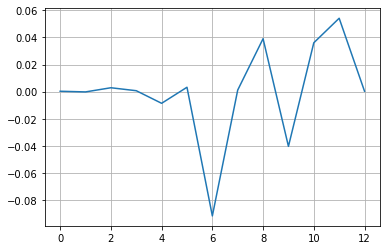

Linear_Model	test_score	train_score
Lasso()		0.050		0.043
Coefs	[-0.         -0.00105397  0.          0.         -0.          0.
 -0.         -0.         -0.         -0.          0.          0.
  0.        ]
Intercept	0.522




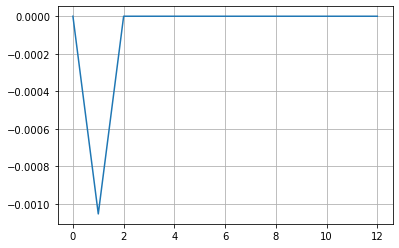

Linear_Model	test_score	train_score
Ridge()		0.096		0.101
Coefs	[ 0.00026024 -0.00022599  0.00284463  0.00065563 -0.0086373   0.00321129
 -0.09175072  0.00113039  0.03902379 -0.0404255   0.03603823  0.05414963
  0.0002763 ]
Intercept	0.575




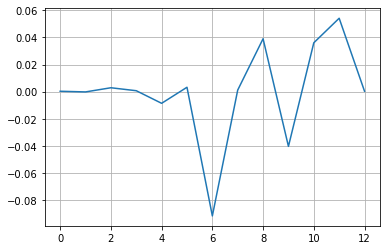

In [329]:
for mod in estimators:
    mod.fit(X_train, y_train)
    print('Linear_Model\ttest_score\ttrain_score')
    print(f'{mod}\t\t{ mod.score(X_test,y_test):.3f}\t\t{ mod.score(X_train,y_train):.3f}\nCoefs\t{mod.coef_}\nIntercept\t{mod.intercept_:.3f}')
    print('\n')
    plt.plot(mod.coef_)
    plt.grid()
    plt.show()

## Итого
Делая вывод о моделях они очень плохо обучились с качеством предсказания не лучше 0,1. Возможно это связано с малым количеством данных. Видно, что коэффициенты у Линейной регрессии и Ridge одинаковы, а у Lasso обнулились: в первом случае, возможно модели заметили похожую закономерность и пошли по одному и тому же пути построения полинома, а во втором случае вообще не найдя закономерности.